<h1><strong>A Match Made In Heaven</strong></h1>
<br>
<strong>Dennis Li, Eric Gao</strong>

<strong><h1>Introduction: </h1></strong> <br>
It may or may not be spring time, but love remains in the air. With the explosion of various different dating sites, online matchmaking has seemingly become the best way to meet new people and get dates. Face-to-face dating events have pretty much become a thing of the past. Nevertheless, speed dating is still a method for romantics to find their soul mate. "Love at first sight". "Star crossed lovers". There are quite a few idioms surrounding the mystery of attraction and love. And then there are always the statements about how personality is what truly makes someone beautiful. But what really makes someone attractive? What makes them attractive enough to take the time to try and get to know their personality.
<br>
By compiling and analyzing data on thousands of speed dates, we can get an idea of what exactly makes certain people seem more desirable than others. This tutorial will walk through different steps to generate analyses that try to find those traits.

<strong>Libraries</strong>
<br>
These will be the libraries that will be necessary for various different analyses.

In [42]:
# This will automatically install seaborn
!pip install --upgrade pip
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (18.1)


<strong>Getting the data</strong>
<br>
Use pandas to read the data from a csv file into a dataframe

In [54]:
dating_info = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")
dating_info.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


<strong>Tidying Data:</strong><br>
A quick glance at the original table reveals an incredible number of different columns, or attributes, that may or may not need to be considered. You will notice many of these attributes are missing data. In trying to find specific traits that make someone attractive or desirable at first glance, the data for some of the attributes would be much more useful than others. Using too many factors to determine attractiveness could make it hard to find a noticeable distinction between being attractive and not. Additionally, each entry in the original table may be missing various values, which pose challenges when attempting to perform analyses on the data. In order to ensure a smooth analysis process, we can take steps to transform, or "tidy", the initial data to something that is easier to work with. After tidying the data, you will see that attributes that were missing data have been removed, in order to ease the analysis process

In [34]:
# take a subset of the columns from the original table
data = dating_info[['iid', 'pid', 'match', 'race', 'race_o', 'age', 'gender', 'field_cd', 'career_c', 'attr3_1', 'attr_o']]

# dictionaries to define the codes used in the table
field_codes = {1: 'Law', 2: 'Math', 3: 'Social Science, Psychologist', 4: 'Medical Science', 5: 'Engineering',
               6: 'English/Creative Writing/Journalism', 7: 'History/Religion/Philosophy', 8: 'Business/Econ/Fiance', 
               9: 'Education, Academia', 10: 'Biological Sciences/Chemistry/Physics', 11: 'Social Work', 12:'Undergrad/Undecided',
               13: 'Political Science/International Affairs', 14: 'Film', 15: 'Fine Arts/Arts Administration',16: 'Languages',
               17: 'Architecture',18: 'Other'}
career_codes = {1:'Lawyer',2:'Academic/Research',3:'Psychologist',4:'Doctor/Medicine',5:'Engineer',6:'Entertainment',
               7:'Finance',8:'Real Estate',9:'International Affairs',10:'Undecided',
               11:'Social Work',12:'Speech Pathology',13:'Politics',14:'Athletics',15:'Other',16:'Journalism',
               17:'Architecture'}
race_codes = {1:'Black',2:'European',3:'Latino/Hispanic',4:'Asian',5:'Native American',6:'Other'}
gender_codes = {0:'female',1:'male'}

# Remove all entries that are missing any data
data = data[pd.notnull(data['race'])]
data = data[pd.notnull(data['age'])]
data = data[pd.notnull(data['field_cd'])]
data = data[pd.notnull(data['career_c'])]
data = data[pd.notnull(data['pid'])]
data = data[pd.notnull(data['race_o'])]
data = data[pd.notnull(data['attr3_1'])]
data = data[pd.notnull(data['attr_o'])]

# Convert all coded columns from floats to ints in order to use the dictionaries defined above
data = data.assign(pid=data['pid'].astype(int))
data = data.assign(race=data['race'].astype(int))
data = data.assign(race_o=data['race_o'].astype(int))
data = data.assign(age=data['age'].astype(int))
data = data.assign(field_cd=data['field_cd'].astype(int))
data = data.assign(career_c=data['career_c'].astype(int))
data = data.assign(attr3_1=data['attr3_1'].astype(int))
data = data.assign(attr_o=data['attr_o'].astype(int))

# Rename some columns
data = data.rename(index=str, columns={"attr3_1":"self_perc", "attr_o":"partner_perc"})

data.head()

,iid,pid,match,race,race_o,age,gender,field_cd,career_c,self_perc,partner_perc
30,4,11,0,2,2,23,0,1,1,7,6
31,4,12,0,2,2,23,0,1,1,7,6
32,4,13,0,2,4,23,0,1,1,7,10
33,4,14,1,2,2,23,0,1,1,7,7
34,4,15,0,2,3,23,0,1,1,7,8


<strong><h1>Exploratory Data Analysis</h1></strong>
<br>
Now that we have finished tidying our data, we can start performing some analyses.

We first make plots showing attractiveness based on some attributes according to the number of total matches based on that specific attribute. We first make a plot of attractiveness based on race.

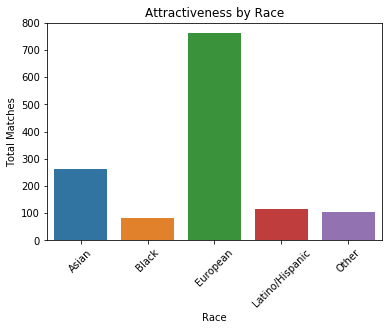

In [4]:
plot_index = 0
plt.figure(plot_index)
plot_index += 1

# Add the decoded race as a new column so when the corresponding bar plot is created, it is easier to read
races = []
races_o = []
for index, row in data.iterrows():
    race_code = row['race']
    race_o_code = row['race_o']
    race = race_codes[race_code]
    race_o = race_codes[race_o_code]
    races.append(race)
    races_o.append(race_o)
data = data.assign(race_desc=races)
data = data.assign(race_o_desc=races_o)

data_grouped = data.groupby('race_desc')
att_by_race = data_grouped['match'].sum().reset_index()
att_by_race.columns = ['Race', 'Total Matches']

# plot attractiveness by race
p = sns.barplot(data=att_by_race, x='Race', y='Total Matches')
plt.title("Attractiveness by Race")
for item in p.get_xticklabels():
    item.set_rotation(45)
plt.show()

Based on this plot, it seems Europeans are the most desirable by a fair margin, followed by Asians and then Latinos/Hispanics

Now let's see how age affects attractiveness

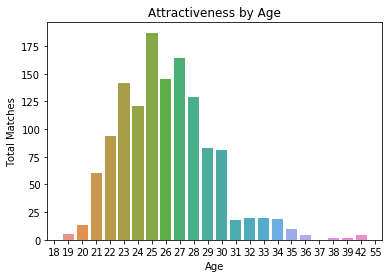

In [5]:
plt.figure(plot_index)
plot_index += 1

data_grouped = data.groupby('age')
att_by_race = data_grouped['match'].sum().reset_index()
att_by_race.columns = ['Age', 'Total Matches']

# plot attractiveness by age
p = sns.barplot(data=att_by_race, x='Age', y='Total Matches')
plt.title("Attractiveness by Age")
plt.show()

From this plot, it seems the most attractive people are those in their 20s

And then let's plot by occupation

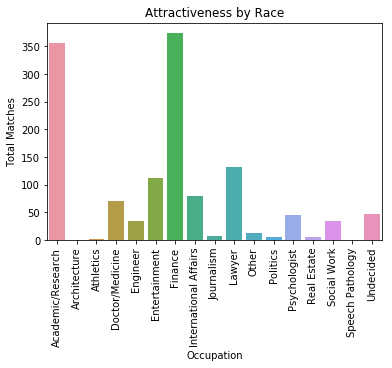

In [6]:
plt.figure(plot_index)
plot_index += 1

# Add the decoded career, or occupation, as a new column so when the corresponding bar plot is created, it is more understandable
occupations = []
for index, row in data.iterrows():
    occupation_code = row['career_c']
    occupation = career_codes[occupation_code]
    occupations.append(occupation)
data = data.assign(occupation=occupations)

data_grouped = data.groupby('occupation')
att_by_race = data_grouped['match'].sum().reset_index()
att_by_race.columns = ['Occupation', 'Total Matches']

# plot attractiveness by race
p = sns.barplot(data=att_by_race, x='Occupation', y='Total Matches')
plt.title("Attractiveness by Race")
for item in p.get_xticklabels():
    item.set_rotation(90)
plt.show()

It seems people in Finance and Academia/Research are the most attractive by quite a bit, followed by Lawyers and those in Entertainment

<strong><h1>Hypothesis Testing</h1></strong>

Though the above exploratory analyses do give an idea of what general characteristics are considered attractive, they don't really provide a good idea of what it means to be attractive, or what makes someone attractive. We can take the next step and try to find the factor, or factors, that really make someone attractive. Based on the analyses from above, a good starting point would be to presume matches come as a result of finding someone attractive. So let's see if this is the case.

In speed dating, two people are set up together by a third party for their "first dates" where they get their first impression of each other. The pair can then request further dates by themselves to ultimately find out if they match or not. I'm sure many of you have heard the saying "Beauty is in the eye of the beholder"; when it comes to judging attractiveness, however, first impressions can have a pretty big impact. For that matter, the ability to make good first impressions can be considered a factor in attractiveness, so let's see how important first impressions, or perceived attractiveness, can be in finding a match.

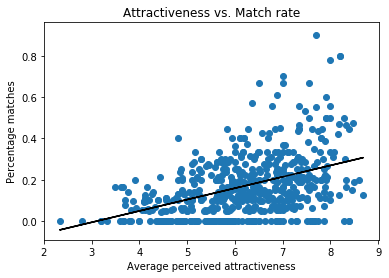

In [51]:
# Isolate all the matches
all_matches = data[data['match'] == 1]
all_matches = all_matches.rename(index=str, columns={"attr3_1":"self_perc", "attr_o":"partner_perc"})

# Find the average of the perceived attractiveness ratings from all the people each person was partnered with
group_by_person = data.groupby('iid')
avg_partner_perc = group_by_person.mean().reset_index()

# Find how many total partners each person had and how many total matches they had as well
group_by_person = data.groupby('iid')
num_partners = group_by_person['pid'].count().reset_index()
num_partners.columns = ['iid','num_partners']
num_matches = group_by_person['match'].sum().reset_index()
num_matches.columns = ['iid', 'num_matches']

# Calculate the percentage of matches each person ended up getting
match_percentages = []
for index, row in num_partners.iterrows():
    iid = row['iid']
    num_partner = row['num_partners']
    num_match_row = num_matches.loc[num_matches['iid']==iid]
    num_match = num_match_row['num_matches']
    match_percentages.append(float(num_match/num_partner))

d = {'match_percentage':match_percentages}
percentage_df = pd.DataFrame(data=d)

# Plot the match rates
plt.figure(plot_index)
plot_index += 1

x = avg_partner_perc['partner_perc']
y = percentage_df['match_percentage']

plt.scatter(x,y)
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color='black')
plt.xlabel('Average perceived attractiveness')
plt.ylabel('Percentage matches')
plt.title('Attractiveness vs. Match rate')
plt.show()

It seems like an increase in a person's average perceived attractiveness is associated with an increase in the person's chances of finding a match. This shouldn't come as too much of a surprise, but let's find the exact correlation to be sure.

In [45]:
# Combine the data from the two separate dataframes into one to make it easier to perform a linear regression
att_vs_matches_data = {'avg_att':x,'match_percentage':y}
att_vs_matches = pd.DataFrame(data=att_vs_matches_data)

# Calculate the correlation
model = ols(formula='match_percentage ~ avg_att', data=att_vs_matches).fit()
model.params

Intercept   -0.171038
avg_att      0.055047
dtype: float64

So it turns out that there is only a correlation of 0.05 between a person's average perceived attractiveness and the chances of them finding a match. This is pretty low ... so there is probably something else that determines if a person is desirable or not.

The plot showing the relation between attractiveness and matches seems to suggest a pretty linear relationship, and yet a calculation of that model reveals a very low correlation. Those two representations may make it hard to visualize or understand why those analyses seem to contradict each other and reveal a low correlation and weak relationship. Here is another way of thinking about the problem.

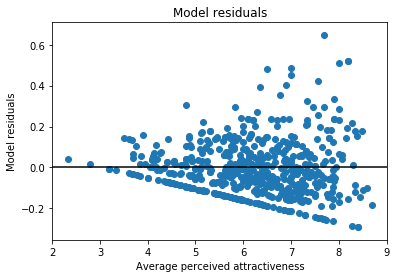

In [52]:
# Calculate the residuals of the model
model_residuals = []
predictions = model.predict()
for index, row in att_vs_matches.iterrows():
    match_percentage = row['match_percentage']
    model_residuals.append(match_percentage - predictions[index])
att_vs_matches['model_residuals'] = model_residuals

# Create a scatter plot of the residuals
plt.figure(plot_index)
plot_index += 1

x = att_vs_matches['avg_att']
y = att_vs_matches['model_residuals']

plt.scatter(x,y)
plt.axhline(0, color='black')
plt.xlabel('Average perceived attractiveness')
plt.ylabel('Model residuals')
plt.title('Model residuals')
plt.show()

This residual plot should reveal that the residuals of the predictions based on the model between attractiveness and match rates are spread out all over the place. Such a fact suggests that the given model is unable to accurately provide predictions for such a relationship.

So now that we know attraction is not the factor, or at least is not the only factor, when it comes to finding a match, this situation begs the questions: What do people look for then? And how much do they value each feature? Well, let's see how the people that participated in this speed dating event answered that question. The representation will assume males and females generally have different criteria and are thus displayed separately.

Let's first calculate the average importance people assigned to various attributes

In [127]:
preferences = dating_info[['iid', 'gender','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]

# Remove any missing entries
preferences = preferences[pd.notnull(preferences['iid'])]
preferences = preferences[pd.notnull(preferences['attr1_1'])]
preferences = preferences[pd.notnull(preferences['sinc1_1'])]
preferences = preferences[pd.notnull(preferences['intel1_1'])]
preferences = preferences[pd.notnull(preferences['fun1_1'])]
preferences = preferences[pd.notnull(preferences['amb1_1'])]
preferences = preferences[pd.notnull(preferences['shar1_1'])]

# Convert columns from floats to ints for easier analysis
preferences = preferences.assign(attr1_1=preferences['attr1_1'].astype(int))
preferences = preferences.assign(sinc1_1=preferences['sinc1_1'].astype(int))
preferences = preferences.assign(intel1_1=preferences['intel1_1'].astype(int))
preferences = preferences.assign(fun1_1=preferences['fun1_1'].astype(int))
preferences = preferences.assign(amb1_1=preferences['amb1_1'].astype(int))
preferences = preferences.assign(shar1_1=preferences['shar1_1'].astype(int))

# Rename columns for better readability
preferences = preferences.rename(index=str, columns={"attr1_1":"attractive", "sinc1_1":"sincere", "intel1_1":"intelligent",
                                                    "fun1_1":"fun", "amb1_1":"ambitious","shar1_1":"shared interests"})

# Remove duplicates
preferences = preferences.groupby('iid')
preferences = preferences.head(1)

# Calculate averages for each gender
preferences = preferences.groupby(['gender'])
preferences = preferences.mean().reset_index()

# Drop the unneeded column
preferences.drop(['iid'], axis=1, inplace=True)

# Decode genders for increased readability
genders = []
for index, row in preferences.iterrows():
    gender_code = row['gender']
    gender = gender_codes[gender_code]
    genders.append(gender)

preferences = preferences.assign(gender=genders)

preferences

,gender,attractive,sincere,intelligent,fun,ambitious,shared interests
0,female,17.880597,18.175373,20.869403,17.253731,12.753731,12.626866
1,male,26.904762,16.300366,19.326007,17.498168,8.725275,10.897436


And now let's graph it.

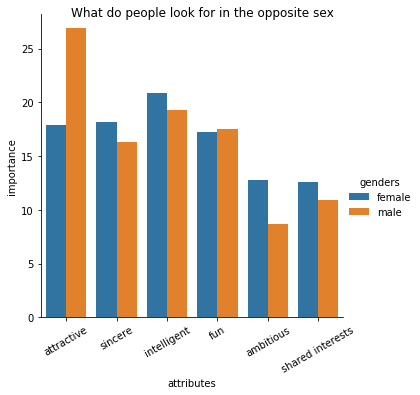

In [128]:
temp = preferences.drop(['gender'], axis=1)

columns = list(temp)
attributes = []
gender = []
values = []
for index, row in preferences.iterrows():
    attributes = attributes + columns
    gender = gender + [row['gender']]*len(columns)
    values = values + list(temp.iloc[index])

d = {'attributes':attributes,'genders':gender,'importance':values}
df = pd.DataFrame(data=d)

plot = sns.catplot(x='attributes', y='importance', hue='genders', data=df, kind='bar')
plot.fig.suptitle("What do people look for in the opposite sex")
plot.set_xticklabels(rotation=30)
plot

Ahh...There we go. So it seems like men put quite a heavy emphasis on traditional attractiveness whereas women prefer their partners to have a balance among a variety of attributes.